In [45]:

# import matplotlib.pyplot as plt
# %matplotlib inline


In [46]:
#import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'
# import pathlib
# import tensorflow as tf

# tf.get_logger().setLevel('ERROR')
# gpus = tf.config.experimental.list_physical_devices('GPU')
"""
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
IMAGE_PATHS = 'test_images/'
"""
    

In [47]:
# PATH_TO_MODEL = "faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8"

In [48]:
# PATH_TO_MODEL_DIR = './training/TF2/pre-trained-models/{}/saved_model/'.format(PATH_TO_MODEL)

In [49]:
# print(PATH_TO_MODEL_DIR)

./training/TF2/pre-trained-models/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/


In [50]:
# PATH_TO_LABELS = './data/label_map.pbtxt'

In [51]:
"""
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR

print('Loading Model...', end='')
start_time = time.time()

detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))
"""

Loading Model...Done! Took 10.861654043197632 seconds


In [52]:
# category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)

Running inference for test_images/EquusQuagga006.jpg... Done
Running inference for test_images/LoxodontaAfricana1951.jpg... Done


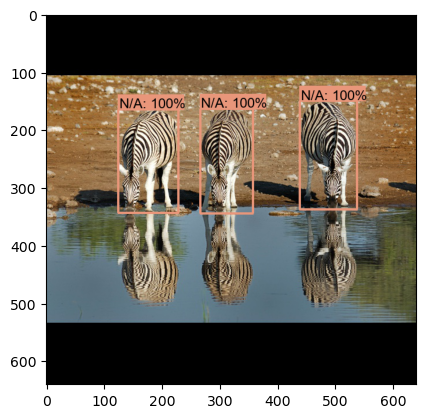

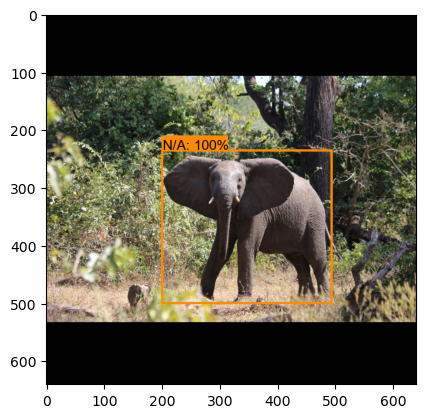

In [55]:
"""
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import warnings
IMAGE_PATHS = 'test_images/'
warnings.filterwarnings('ignore')

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

for image_path in os.listdir(IMAGE_PATHS):
    image_path = os.path.join(IMAGE_PATHS, image_path)
    print('Running inference for {}... '.format(image_path), end='')
    image_np =load_image_into_numpy_array(image_path)
    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]
    
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key,value in detections.items()}
    detections['num_detections'] = num_detections
    
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    image_np_with_detections = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.75,
        agnostic_mode=False)
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()
"""

In [ ]:
"""
Here we do inferencing for object detection of our TF2 model.
We loaded our model and ran our inference.
We were able to successfully detect our objects in Tensorboard but here in Jupyter lab there was a labelling error in
the end. But the images were tracked successfully in the Tensorboard.
"""